In [1]:
from sklearn.datasets.samples_generator import make_regression

In [4]:
X, y = make_regression(n_samples = 1000, 
                      n_features = 1,
                      noise = 10,
                      random_state = 42)
#noise 클수록 더 커짐 

In [5]:
X[:10]

array([[-1.75873949],
       [ 1.03184454],
       [-0.48760622],
       [ 0.18645431],
       [ 0.72576662],
       [ 0.97255445],
       [ 0.64537595],
       [ 0.68189149],
       [-1.43014138],
       [ 1.06667469]])

In [7]:
gd_lr = linear_model.LinearRegresionGD(eta0=0.001, epochs = 10000, batch_size = 1, shuffle=False)
#pure GD

NameError: name 'linear_model' is not defined

In [8]:
bgd_lr= linear_model.LinearRegressionGD(eta0=0.001, epochs = 10000, batch_size = len(X), shuffle = False)
#full batch


NameError: name 'linear_model' is not defined

In [9]:
sgd_lr= linear_model.LinearRegressionGD(eta0=0.001, epochs = 10000, batch_size = len(X), shuffle = True)
#stochastic 


NameError: name 'linear_model' is not defined

In [ ]:
msgd_lr= linear_model.LinearRegressionGD(eta0=0.001, epochs = 10000, batch_size = 100, shuffle = True)



# Linear Regression with Normal Equation

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_boston
boston=load_boston()

In [14]:
boston.keys()
# key value로 들어옴

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
df.shape

(506, 13)

In [42]:
X = df.values
y = boston.target

In [40]:
from sklearn.linear_model import LinearRegression
#LinearRegression패키지는 Normal Equation 으로 구현해 놓은 것. 

In [41]:
lr_ne = LinearRegression(fit_intercept=True)


Normal Equation은 함수 안에 파라미터가 별로 없음<br>
noramlize= > 이부분은 우리가 직접 데이터 Standard 혹은 Minmax로 노멀라이즈 했으면<br>
넣을 필요가 없음. <br>
copy_X 는 x 복사 할지 안할지 <br>
n_jobs = CPU 몇개 쓸지

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [46]:
lr_ne.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lr_ne.intercept_, lr_ne.coef_

(33.3880621893243,
 array([-1.28060398e-01,  3.77955693e-02,  5.86107797e-02,  3.24007007e+00,
        -1.62222676e+01,  3.89352244e+00, -1.27879944e-02, -1.42326864e+00,
         2.34513082e-01, -8.20261127e-03, -9.29950535e-01,  1.19151410e-02,
        -5.48489997e-01]))

In [49]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [26]:
y_true

array([ 2.90873546e+01,  3.19912938e+00,  3.09101980e+01, -1.15647602e+01,
       -2.78174616e+01, -3.23701757e+00,  8.19443864e+00,  1.86658220e+01,
        3.56996967e+00, -2.04938545e+01, -2.47550225e+01,  2.35432404e+01,
        1.71925608e+01,  3.56521007e+01, -1.56019101e+01,  1.27922014e+01,
        2.70045043e-01,  1.59035645e+00, -2.53455157e+01,  1.79249236e+01,
        1.81704267e+01, -1.85848453e+01,  3.99485453e+00, -1.92738111e+01,
       -6.98937569e+00,  1.31908868e+00, -4.51688631e+00,  1.99358804e+01,
        2.25201158e+01, -6.58952529e+00,  3.57412553e+01, -1.83286517e-01,
       -9.02154286e+00, -6.60256461e+00, -5.68317167e+00, -2.67308232e+01,
        1.16222322e+01, -1.03846823e+01,  3.39466165e+01, -2.71151661e+01,
       -1.16617230e+01, -4.29633678e-01, -1.79429654e+01,  2.05203914e+01,
       -1.50103404e+01, -2.05508831e+01, -3.27452372e+01,  9.53066801e+00,
       -1.07978084e+01,  1.04974347e-01, -4.53608855e+00, -2.37587251e+01,
        2.03137572e+01, -

In [51]:
rmse = np.sqrt(sum((y_hat-y_true)**2)/len(y_true))
rmse

4.554903221837861

In [56]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.747143360308932

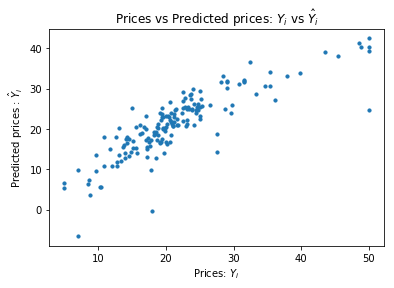

In [58]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#어느정도 Linear 하게 나가지

# Linear Regression with SGD

근데 LinearRegression SGD쓸 필요가 없어. <br>
그냥 Normal Equation 쓰면 돼. 

In [67]:

from sklearn.linear_model import SGDRegressor
#Gradient Descent 기반은 상당히 함수에 파라미터가 많음
lr_SGD = SGDRegressor()
#loss, penalty(l1, l2), alpha-> regulization할 때 lambda
#tolerance -> 이전 loss와 다음 loss가 얼마 이상 차이나면 멈출건지
#eta0는 learning rate그 자체 
#learing rate -> 는 러닝레이트 내릴껀지 그 공식을 말함

In [60]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [61]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.33, random_state=42)

In [81]:
lr_SGD.fit(X_train, y_train)

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [82]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [83]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(sum((y_hat-y_true)**2)/len(y_true))
rmse, mse

(4.840872696597067, 23.43404846465897)

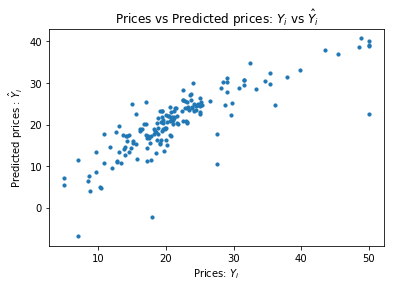

In [85]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#학습이 잘 됬음(Scaled Data 덕분)

# Linear Regression with Ridge & Lasso Regression

In [91]:
from sklearn.linear_model import Lasso, Ridge
#릿지든 랏소든, Normal Equation 이랑도 되고, GD랑도 되지

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [92]:
ridge = Ridge(fit_intercept=True, alpha = 0.5)
#alpha mean lambda value
ridge.fit(X_train, y_train)
#lasso = Lasso(fit_intercept=True, alpha=0.5)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
y_hat = ridge.predict(X_test)
y_true = y_test

In [94]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(sum((y_hat-y_true)**2)/len(y_true))
rmse, mse

(4.581368851153035, 20.988940550315267)

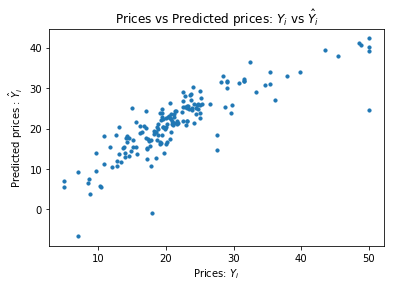

In [95]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#학습이 잘 됬음(Scaled Data 덕분)

### 람다 값 계속 바꿔가면서 릿지 그려 보기

In [118]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
# 20부터 50까지 0.01간격으로
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    p = ridge.predict(X_test)
    err = p-y_test
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))
    #여기까지는 해당 alpha넣고 rmse구하고

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        #train이랑 test가 인덱스 return 함
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

51
0
0
0
0
0
0
0
0
0
0.010	 4.5554		 5.8806
51
0
0
0
0
0
0
0
0
0
0.418	 4.5773		 5.8467
51
0
0
0
0
0
0
0
0
0
0.826	 4.5957		 5.8319
51
0
0
0
0
0
0
0
0
0
1.234	 4.6097		 5.8234
51
0
0
0
0
0
0
0
0
0
1.642	 4.6203		 5.8175
51
0
0
0
0
0
0
0
0
0
2.050	 4.6284		 5.8126
51
0
0
0
0
0
0
0
0
0
2.458	 4.6349		 5.8082
51
0
0
0
0
0
0
0
0
0
2.866	 4.6402		 5.8041
51
0
0
0
0
0
0
0
0
0
3.274	 4.6445		 5.8000
51
0
0
0
0
0
0
0
0
0
3.682	 4.6481		 5.7960
51
0
0
0
0
0
0
0
0
0
4.090	 4.6512		 5.7920
51
0
0
0
0
0
0
0
0
0
4.498	 4.6538		 5.7880
51
0
0
0
0
0
0
0
0
0
4.906	 4.6562		 5.7840
51
0
0
0
0
0
0
0
0
0
5.313	 4.6582		 5.7800
51
0
0
0
0
0
0
0
0
0
5.721	 4.6600		 5.7760
51
0
0
0
0
0
0
0
0
0
6.129	 4.6616		 5.7720
51
0
0
0
0
0
0
0
0
0
6.537	 4.6631		 5.7680
51
0
0
0
0
0
0
0
0
0
6.945	 4.6644		 5.7641
51
0
0
0
0
0
0
0
0
0
7.353	 4.6657		 5.7602
51
0
0
0
0
0
0
0
0
0
7.761	 4.6668		 5.7563
51
0
0
0
0
0
0
0
0
0
8.169	 4.6679		 5.7524
51
0
0
0
0
0
0
0
0
0
8.577	 4

In [111]:
kf=KFold(10)
# for train, test in kf.split(X):
#     print(X[train])
#     print(X[test])

X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [96]:
np.linspace(0.01, 20, 50)

array([1.00000000e-02, 4.17959184e-01, 8.25918367e-01, 1.23387755e+00,
       1.64183673e+00, 2.04979592e+00, 2.45775510e+00, 2.86571429e+00,
       3.27367347e+00, 3.68163265e+00, 4.08959184e+00, 4.49755102e+00,
       4.90551020e+00, 5.31346939e+00, 5.72142857e+00, 6.12938776e+00,
       6.53734694e+00, 6.94530612e+00, 7.35326531e+00, 7.76122449e+00,
       8.16918367e+00, 8.57714286e+00, 8.98510204e+00, 9.39306122e+00,
       9.80102041e+00, 1.02089796e+01, 1.06169388e+01, 1.10248980e+01,
       1.14328571e+01, 1.18408163e+01, 1.22487755e+01, 1.26567347e+01,
       1.30646939e+01, 1.34726531e+01, 1.38806122e+01, 1.42885714e+01,
       1.46965306e+01, 1.51044898e+01, 1.55124490e+01, 1.59204082e+01,
       1.63283673e+01, 1.67363265e+01, 1.71442857e+01, 1.75522449e+01,
       1.79602041e+01, 1.83681633e+01, 1.87761224e+01, 1.91840816e+01,
       1.95920408e+01, 2.00000000e+01])

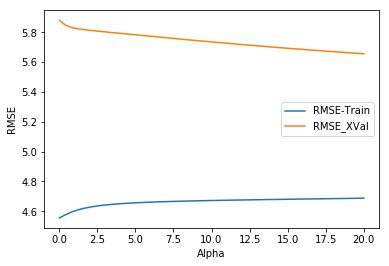

In [99]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()
#람다 늘릴수록 기존 Train 의 RMSE는 늘어나고
# TEST데이터의 RMSE 늘어남. 

In [100]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: linear regression
RMSE on training: 4.5549
RMSE on 10-fold CV: 5.8819
Method: lasso
RMSE on training: 4.7270
RMSE on 10-fold CV: 5.7675
Method: ridge
RMSE on training: 4.5710
RMSE on 10-fold CV: 5.8535


### 특별한 경우가 아니면 <br>
SGD보다는 Lasso나 Ridge를 쓰는게 더 좋은 성능을 낸다. 